**SquarePharma Stock Analysis**

---






This report provides a comprehensive assessment of Square Pharmaceuticals Ltd., the top pharmaceutical company in Bangladesh. It analyzes the company's financial health, market positioning, and long-term investment potential. Square demonstrates solid financial performance. The company operates and maintains strong liquidity, profitability, and dividend consistency. Square’s leadership in the domestic market and its presence in over 40 countries underline its strategic advantage. Backed by innovation, strategic expansions, and a commitment to quality, Square Pharma is recommended as a sound investment for those seeking stable returns in the pharmaceutical sector.


**<u>Aim of this report</u>**

The primary goal is to evaluate whether investing in Square Pharma shares is a smart, long-term decision for investors in today’s competitive capital market. By examining both its historical track record and future prospects, this analysis offers a holistic view of Square’s strengths, challenges, and investment appeal.

------------------------------------------------

Importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import date
from prophet import Prophet

Loading Data from SquarePharma, including other pharmaceutical companies, such as
BEXIMCO, ACI for comparison
> `df_aci`  `df_beximco`  `df_squarepharma`






> Dataset retrieved from [Investing](https://www.investing.com)



In [3]:
df_aci = pd.read_csv('csv/aci_stock.csv')
df_beximco = pd.read_csv('csv/beximco_stock.csv')
df_squarepharma = pd.read_csv('csv/squarepharma_stock.csv')

df_all_stock = df_aci, df_beximco, df_squarepharma


# Converting the column 'volume',containing 'K' and 'M', to numeric float
def volume_to_numeric(vol):
  vol = str(vol).replace(',','')
  if vol.endswith('K'):
    return float(vol[:-1]) * 1000
  elif vol.endswith('M'):
    return float(vol[:-1]) * 1000000
  else:
    return float(vol)

for df in df_all_stock:
  df['Date'] = pd.to_datetime(df['Date'])
  df['Vol.'] = df['Vol.'].apply(volume_to_numeric)
  df['Change %'] = df['Change %'].str.replace('%','').astype(float)
  df = df.sort_values(by='Date', ascending=True)
  print(df)


           Date   Price    Open    High     Low      Vol.  Change %
2446 2015-01-01  184.86  186.10  188.53  184.28  106250.0     -0.67
2445 2015-01-05  182.47  183.81  184.24  182.18   62210.0     -1.29
2444 2015-01-06  182.95  182.85  184.67  182.09  108600.0      0.26
2443 2015-01-07  185.53  182.90  186.15  182.90   65690.0      1.41
2442 2015-01-08  184.38  184.24  185.10  183.76   46280.0     -0.62
...         ...     ...     ...     ...     ...       ...       ...
4    2025-05-06  174.20  174.10  175.00  172.30   31470.0     -0.23
3    2025-05-07  166.30  171.70  171.70  165.20   78350.0     -4.54
2    2025-05-08  170.60  167.00  171.90  167.00   28810.0      2.59
1    2025-05-12  170.90  173.50  174.00  169.50    9360.0      0.18
0    2025-05-13  170.10  170.10  171.80  169.80   25250.0     -0.47

[2447 rows x 7 columns]
           Date  Price  Open  High   Low       Vol.  Change %
2454 2015-01-01   56.0  54.0  57.0  54.0  1380000.0      5.66
2453 2015-01-05   57.0  56.0  57.0 

In [4]:
df_squarepharma.info(), df_aci.info(), df_beximco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2461 non-null   datetime64[ns]
 1   Price     2461 non-null   float64       
 2   Open      2461 non-null   float64       
 3   High      2461 non-null   float64       
 4   Low       2461 non-null   float64       
 5   Vol.      2461 non-null   float64       
 6   Change %  2461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 134.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2447 non-null   datetime64[ns]
 1   Price     2447 non-null   float64       
 2   Open      2447 non-null   float64       
 3   High      2447 non-null   float64       
 4   Low       2447 non-null   float6

(None, None, None)

### Stock Visualization

**Stock Price Over Time (2015–2025)**: Square Pharma’s stock rose from 180 BDT  in 2015 to 270 BDT by mid-2018, but the 2020 pandemic dropped it to 160 BDT. It recovered slowly, settling at 210-220 BDT by 2022 with a brief spike to 240 BDT in 2021, and hovered at 210 BDT in 2024, showing a modest revival.

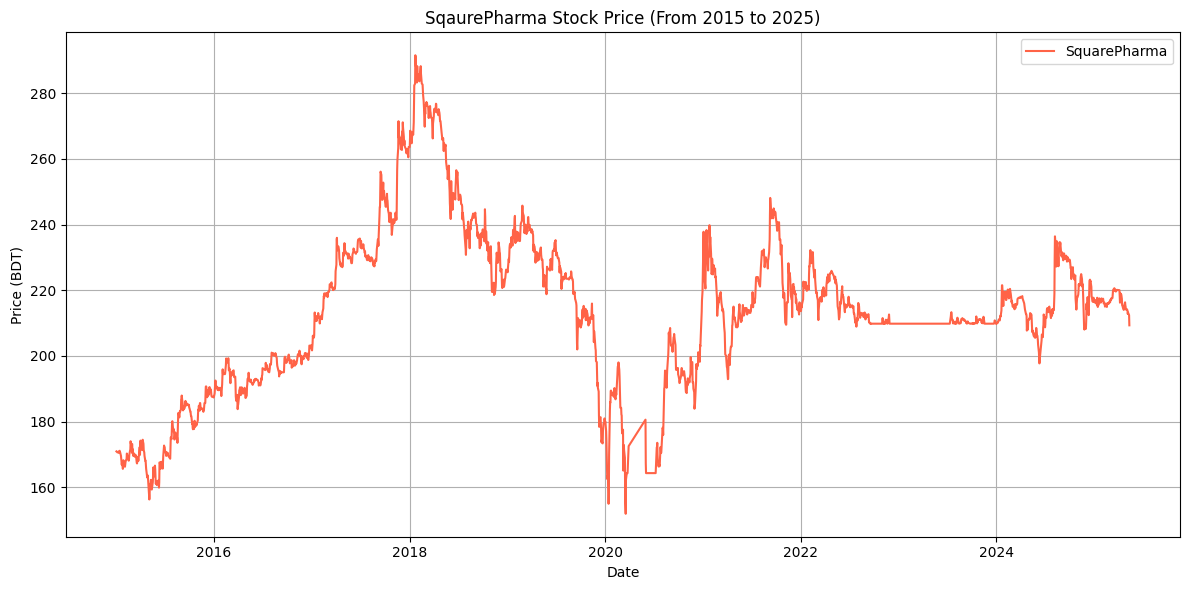

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_squarepharma['Date'], df_squarepharma['Price'], label='SquarePharma', color='tomato')
plt.title('SqaurePharma Stock Price (From 2015 to 2025)')
plt.xlabel('Date')
plt.ylabel('Price (BDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Stock Price trend between Pharmaceuticals companies in Bangladesh (2015-2025)**: SquarePharma stock price remains steadily increasing, while other are volatile in their price movement, even so sharper dip

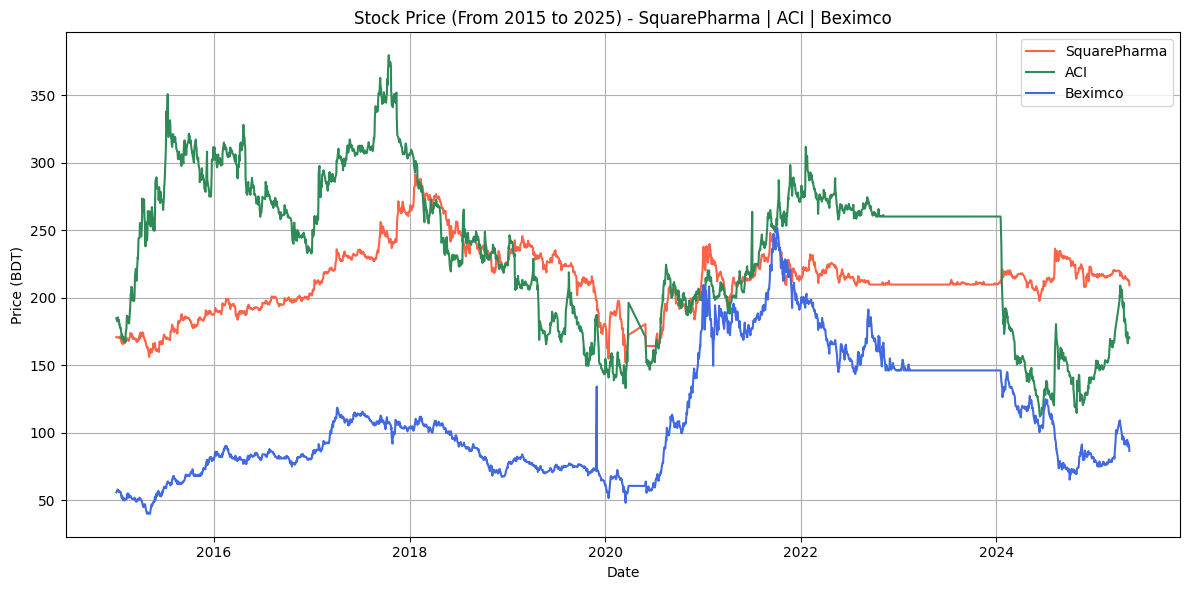

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df_squarepharma['Date'], df_squarepharma['Price'], label='SquarePharma', color='tomato')
plt.plot(df_aci['Date'], df_aci['Price'], label='ACI', color='seagreen')
plt.plot(df_beximco['Date'], df_beximco['Price'], label='Beximco', color='royalblue')
plt.title('Stock Price (From 2015 to 2025) - SquarePharma | ACI | Beximco')
plt.xlabel('Date')
plt.ylabel('Price (BDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Trading volumes of SquarePharma trend**

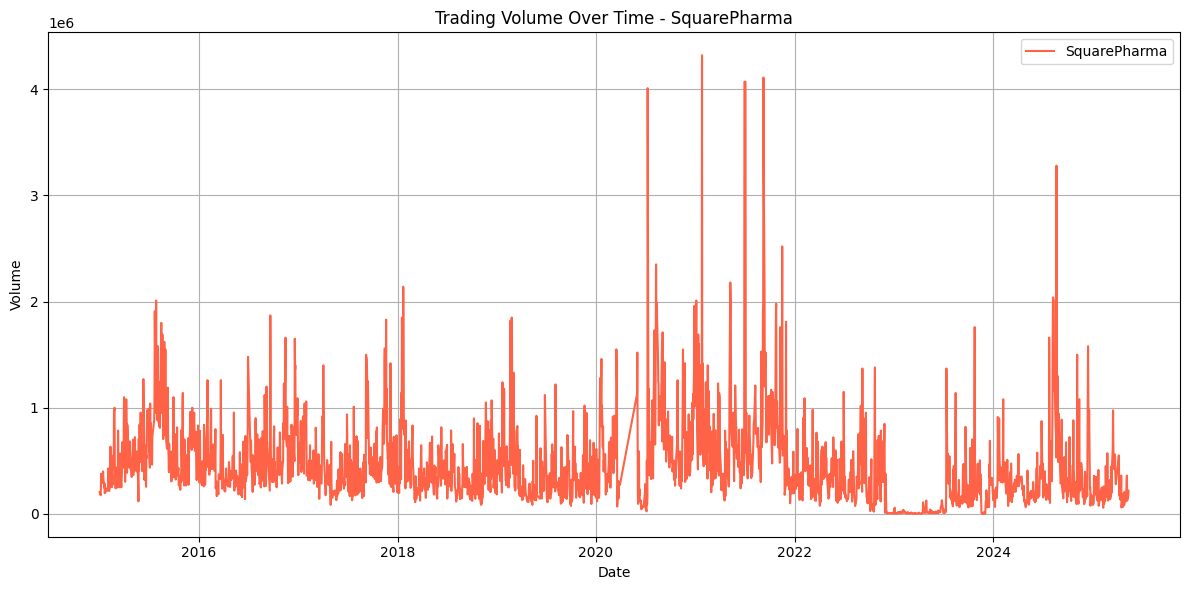

In [7]:
# New variable for SquarePharma data, because one of single volume inflates the whole chart unnaturally
df_squarepharma = df_squarepharma.drop(df_squarepharma[df_squarepharma['Vol.'] == df_squarepharma['Vol.'].max()].index)

#Chart
plt.figure(figsize=(12, 6))
plt.plot(df_squarepharma['Date'], df_squarepharma['Vol.'], label='SquarePharma', color='tomato')
plt.title('Trading Volume Over Time - SquarePharma')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Histogram of Stock Prices**: Square Pharma’s stock mostly traded between 210 and 240 BDT

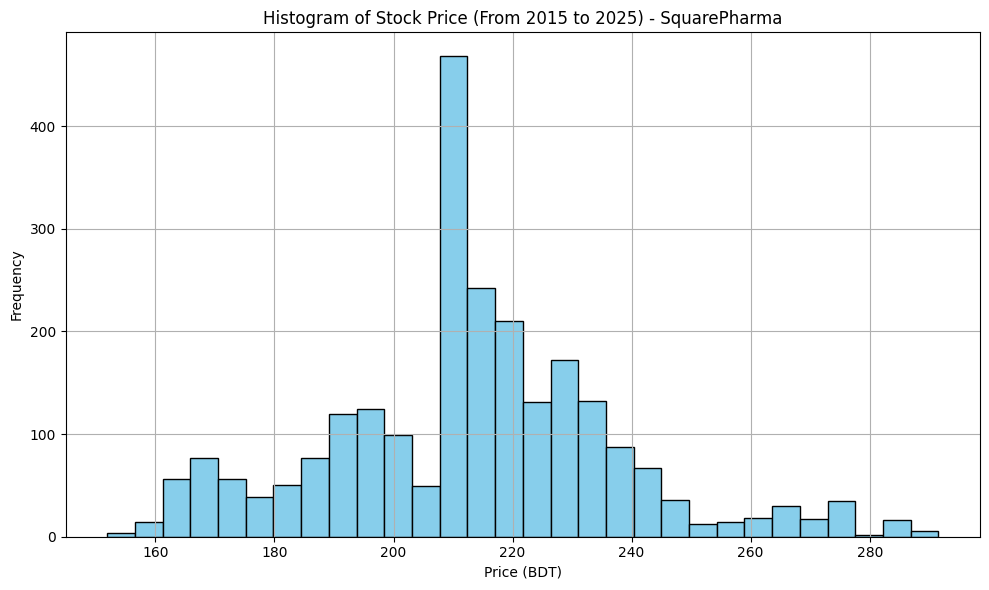

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_squarepharma['Price'],bins = 30, color='skyblue', edgecolor  = 'black')
plt.title('Histogram of Stock Price (From 2015 to 2025) - SquarePharma')
plt.xlabel('Price (BDT)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


**SquarePharma CandleStick**:The recent trend suggest there is bearish situation, and is reacting to bad news or market condition

In [ ]:

df_squarepharma_last_90days = df_squarepharma.head(90)

fig = go.Figure(data=[go.Candlestick(
    x = df_squarepharma_last_90days['Date'],
    open = df_squarepharma_last_90days['Open'],
    high= df_squarepharma_last_90days['High'],
    low = df_squarepharma_last_90days['Low'],
    close= df_squarepharma_last_90days['Price'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red'
)])

fig.update_layout(
    title = 'SquarePharma - Candlestick Chart (Last 90 days)',
    xaxis_title = 'Date',
    yaxis_title = 'Price',
    xaxis_rangeslider_visible = False,
    template = 'plotly_white'
)

fig.show()

**Volatility**: Square Pharma has the lowest volatility, peaking at a density of 100 around 0.01, suggesting price stability. Beximco’s volatility is slightly higher, peaking at a density of 30 around 0.02, while ACI’s is the highest, peaking at 20 around 0.03, indicating greater price fluctuations and risk.

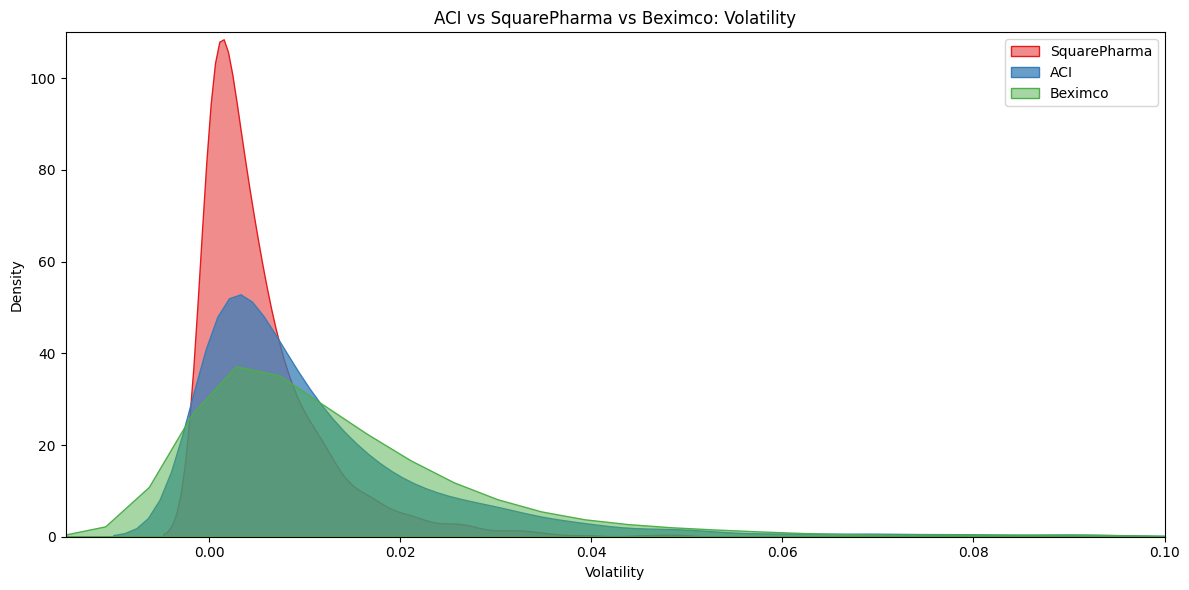

In [ ]:
for df in df_all_stock:
  df['Volatility'] = df['Price'].pct_change().abs()

df_aci_volatility = df_aci['Volatility'].dropna()
df_squarepharma_volatility = df_squarepharma['Volatility'].dropna()
df_beximco_volatility = df_beximco['Volatility'].dropna()


sns.set_palette('Set1')

plt.figure(figsize=(12,6))
sns.kdeplot(df_squarepharma_volatility, label = 'SquarePharma',fill=True, alpha=0.5)
sns.kdeplot(df_aci_volatility, label = 'ACI',fill=True, alpha=0.75)
sns.kdeplot(df_beximco_volatility, label = 'Beximco',fill=True, alpha=0.5)

plt.ylim(0,110)
plt.xlim(-0.015,0.1)
plt.title('ACI vs SquarePharma vs Beximco: Volatility')
plt.xlabel('Volatility')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

**Correlation between Pharmaceutical's daily return in Bangladesh**: SquarePharma has non that correlate significantly to any other companies, even in the same industry.

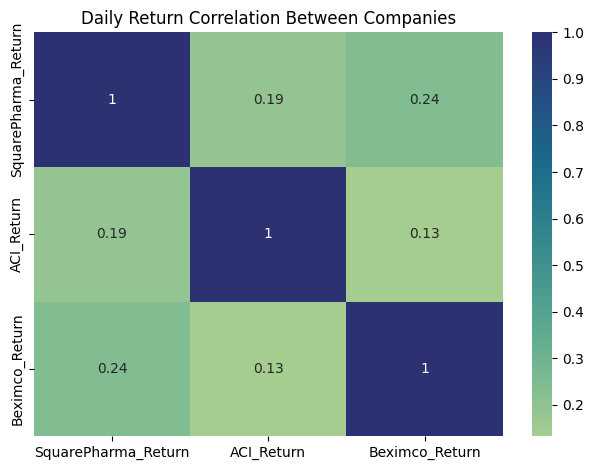

In [ ]:
merged_df = df_squarepharma[['Date', 'Price']].rename(columns={'Price': 'SquarePharma'})
merged_df = merged_df.merge(df_aci[['Date', 'Price']].rename(columns={'Price': 'ACI'}), on='Date')
merged_df = merged_df.merge(df_beximco[['Date', 'Price']].rename(columns={'Price': 'Beximco'}), on='Date')

merged_df['SquarePharma_Return'] = merged_df['SquarePharma'].pct_change()
merged_df['ACI_Return'] = merged_df['ACI'].pct_change()
merged_df['Beximco_Return'] = merged_df['Beximco'].pct_change()
returns_df = merged_df.dropna()

correlation = returns_df[['SquarePharma_Return', 'ACI_Return', 'Beximco_Return']].corr()

sns.heatmap(correlation, annot=True, cmap='crest')
plt.title("Daily Return Correlation Between Companies")
plt.tight_layout()
plt.show()

**Stock Price Forecast with Python Prophet**: The 180-day forecast, generated using Python’s Prophet library predicts Square Pharma’s stock price through mid-2025. Prophet models trends, seasonality, and holidays, accounting for uncertainty, and projects a volatile but upward trajectory to around 235 by Q3-2025. The uncertainty intervals (shaded areas) suggest potential fluctuations, reflecting market variability and external factors.
> Prediction is based on testing last 1000 days as represented : `df_squarepharma_last_1000_days`

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5wvykmb/k5sr5vvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb5wvykmb/icnodcsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64802', 'data', 'file=/tmp/tmpb5wvykmb/k5sr5vvg.json', 'init=/tmp/tmpb5wvykmb/icnodcsy.json', 'output', 'file=/tmp/tmpb5wvykmb/prophet_model51ouf5e5/prophet_model-20250516160727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


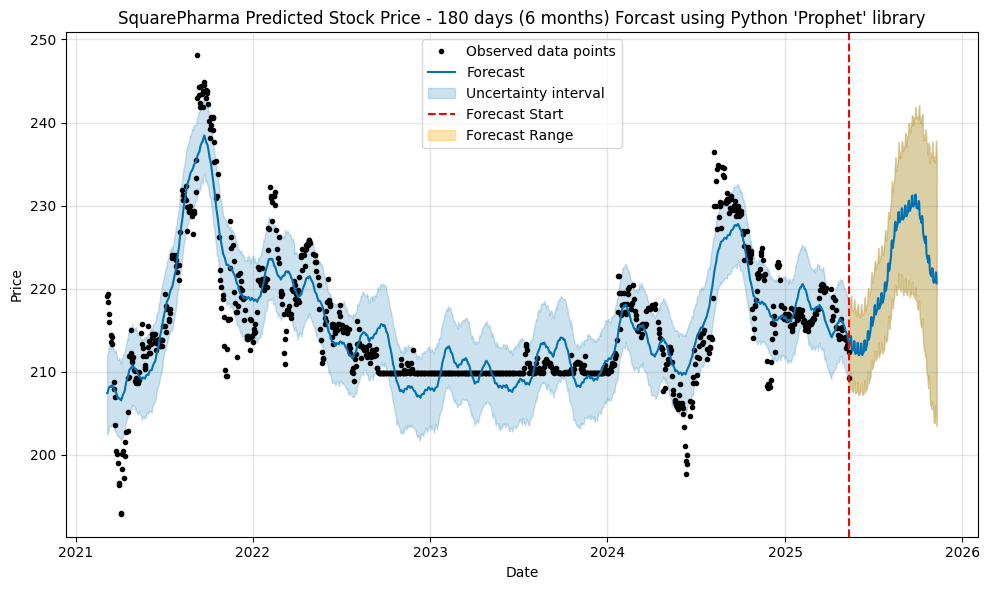

In [10]:
df_squarepharma_last_1000_days = df_squarepharma.head(1000)


prophet_df = df_squarepharma_last_1000_days[['Date','Price']].rename(columns = {'Date':'ds','Price':'y'})
model = Prophet(daily_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)


fig1 = model.plot(forecast)

plt.title("SquarePharma Predicted Stock Price - 180 days (6 months) Forcast using Python 'Prophet' library")
plt.xlabel('Date')
plt.ylabel('Price')

last_date = prophet_df['ds'].max()
plt.axvline(x = last_date, color = 'red', linestyle = '--', label = 'Forecast Start')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], where = forecast['ds'] > last_date, color = 'orange', alpha = 0.3, label = 'Forecast Range')

plt.legend()
plt.tight_layout()
plt.show()


### **Financial ratio**

>Dataset retrieved from [Amarstock](https://www.amarstock.com)

In [12]:
ratio_squarepharma = pd.read_csv('csv/squarepharma_ratio.csv', index_col='Ratio')
ratio_squarepharma = ratio_squarepharma.T
ratio_squarepharma.index.name = 'Year'
ratio_squarepharma.index = ratio_squarepharma.index.astype(int)
ratio_squarepharma

Ratio,EPS,Current ratio,Acid Test Ratio,Leverage Ratio (Debt ratio),Net Profit Margin,ROE,ROA,Asset Turnover,Fixed Asset Turnover,Inventory Turnover
Year,,,,,,,,,,
2024,23.61,13.48,11.10,5.06,26.15,14.56,13.82,0.53,2.53,2.94
2023,21.41,16.67,13.78,5.43,27.11,14.29,13.51,0.50,2.33,2.59
2022,20.51,17.03,14.78,5.87,24.32,15.35,14.45,0.59,2.44,3.40
2021,17.99,17.33,15.05,4.77,25.35,16.27,15.50,0.61,2.55,3.42


**Consistent EPS Growth**: EPS grew from 18 to 23.61, signaling steady earnings growth for shareholders.

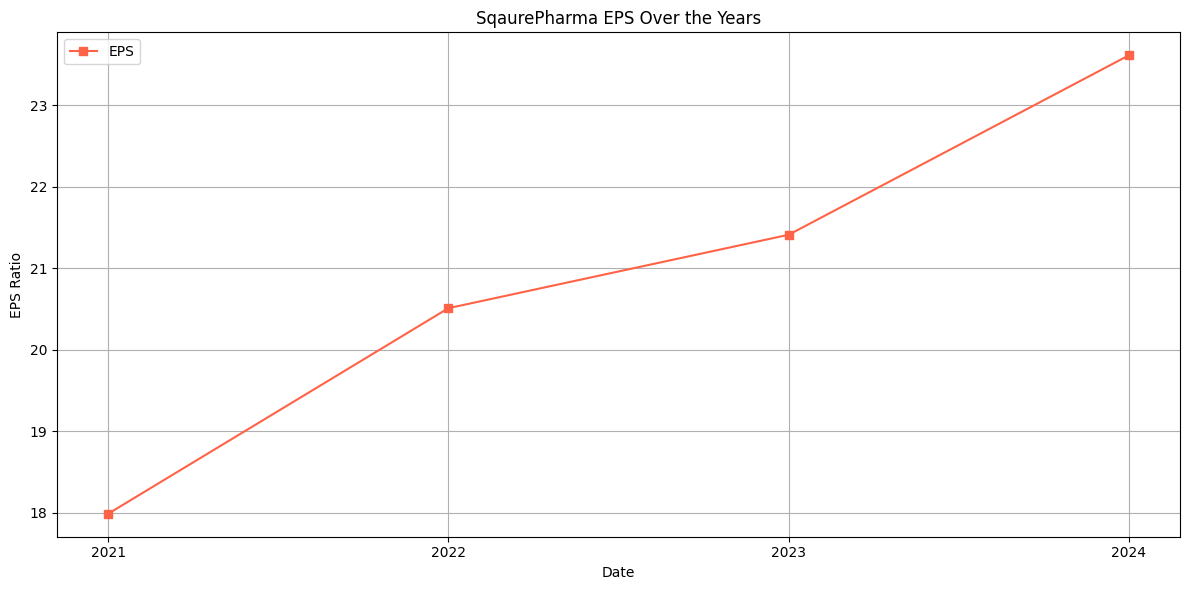

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ratio_squarepharma.index, ratio_squarepharma['EPS'],marker ='s', label='EPS', color='tomato')
plt.title('SqaurePharma EPS Over the Years')
plt.xlabel('Date')
plt.ylabel('EPS Ratio')
plt.xticks([2021,2022,2023,2024])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Stable and Recoverable Profitability**: The profitability metrics remain stable with no significant rise or decline

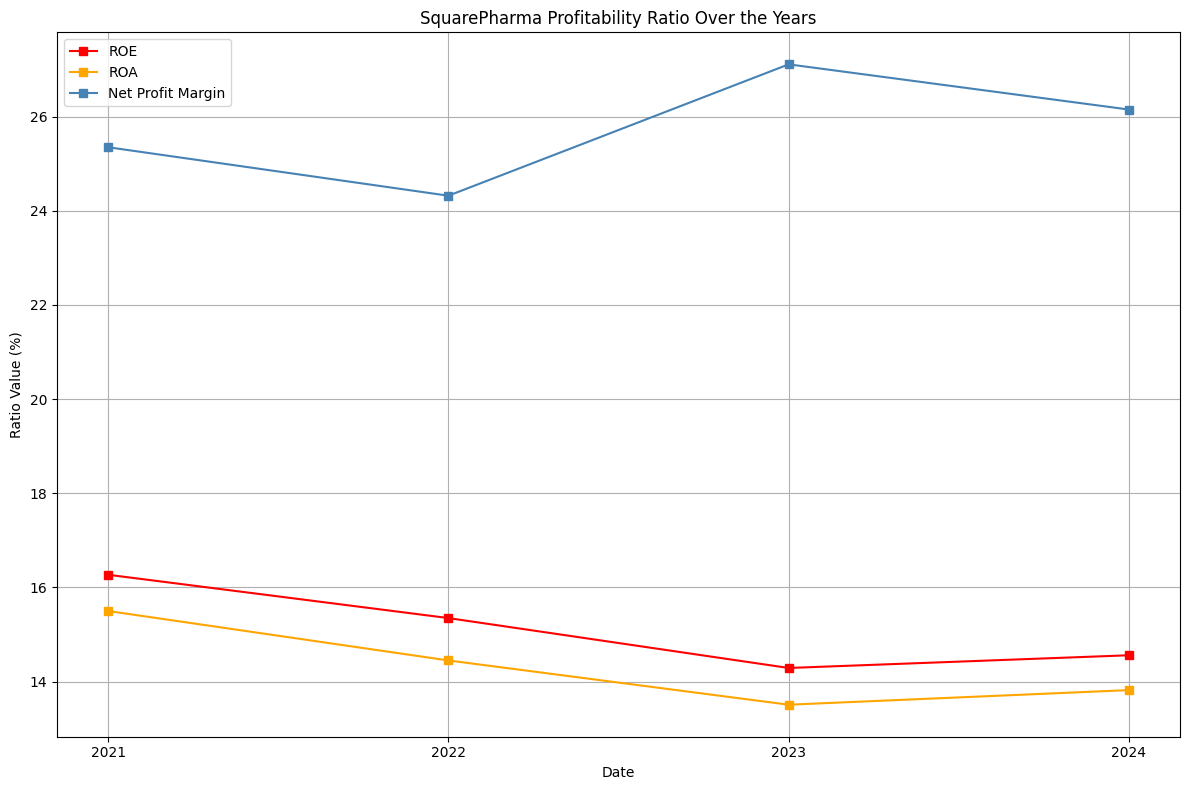

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(ratio_squarepharma.index, ratio_squarepharma['ROE'],marker ='s', label='ROE', color='red')
plt.plot(ratio_squarepharma.index, ratio_squarepharma['ROA'],marker ='s', label='ROA', color='orange')
plt.plot(ratio_squarepharma.index, ratio_squarepharma['Net Profit Margin'],marker ='s', label='Net Profit Margin', color='steelblue')
plt.title('SquarePharma Profitability Ratio Over the Years')
plt.xlabel('Date')
plt.ylabel('Ratio Value (%)')
plt.xticks([2021,2022,2023,2024])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Modest Asset Efficiency**: Asset turnover rose from 0.53 to 0.61, fixed asset turnover held at 2.44–2.55, and overall turnover grew from 2.94 to 3.42, indicating moderate but improving efficiency.

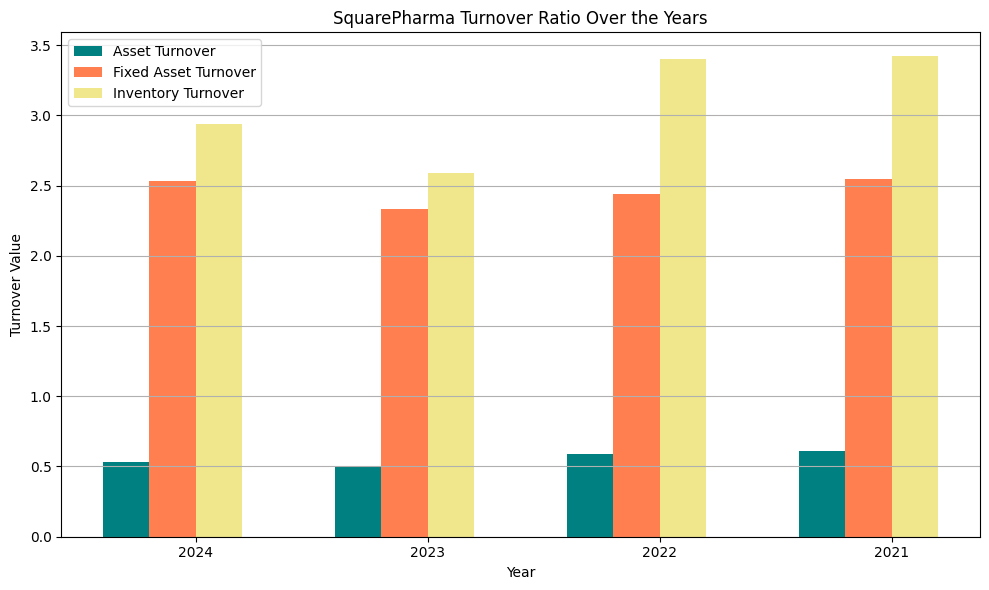

In [15]:
selected_ratio = ratio_squarepharma[['Asset Turnover','Fixed Asset Turnover','Inventory Turnover']]

x = np.arange(len(ratio_squarepharma.index))

years= selected_ratio.index
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.bar(x - 1.5*width, selected_ratio['Asset Turnover'], width, label='Asset Turnover', color ='teal')
bar2 = ax.bar(x  - 0.5*width, selected_ratio['Fixed Asset Turnover'], width, label='Fixed Asset Turnover', color ='coral')
bar3 = ax.bar(x + 0.5*width, selected_ratio['Inventory Turnover'], width, label='Inventory Turnover', color ='khaki')

ax.set_xlabel('Year')
ax.set_ylabel('Turnover Value')
ax.set_title('SquarePharma Turnover Ratio Over the Years')
ax.set_xticks(x)
ax.grid(axis='y')
ax.set_xticklabels(years)
ax.legend()
plt.tight_layout()
plt.show()

**Low and Stable Leverage**: Debt ratio peaked at 5.87% in 2022, falling to 5.06% by 2024, reflecting minimal debt reliance.

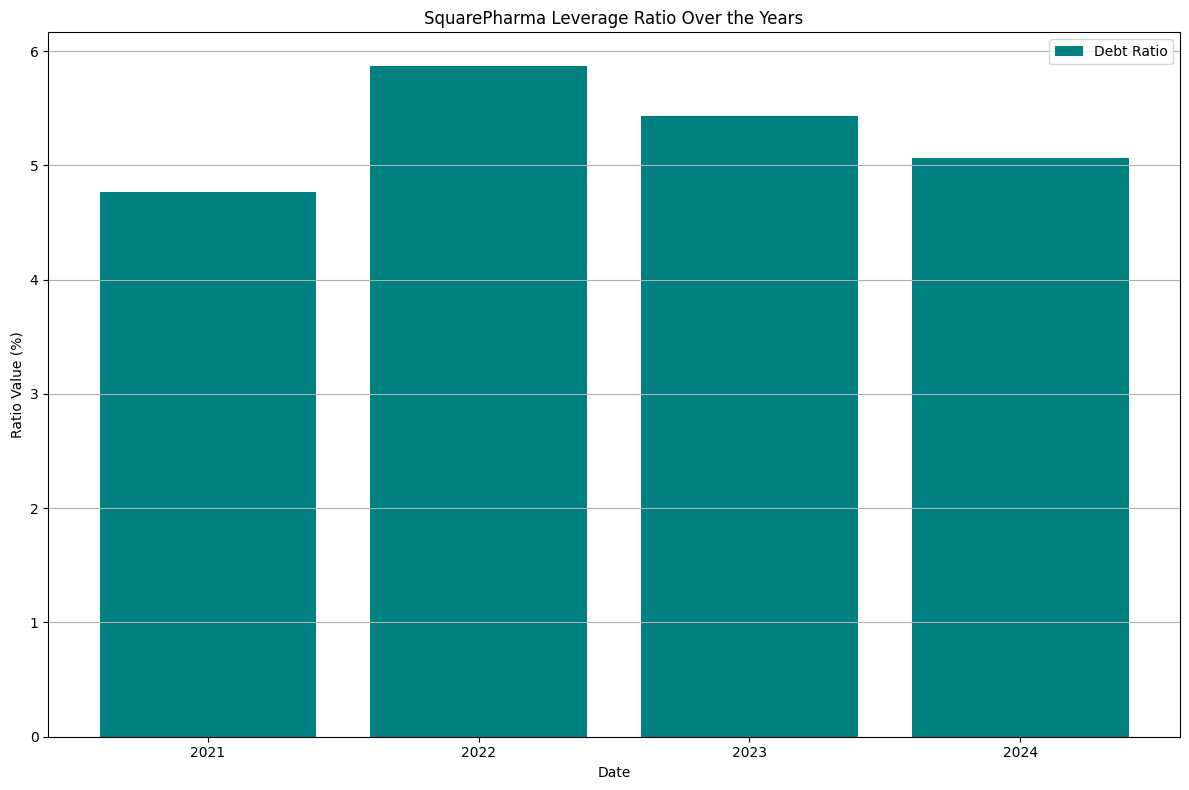

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(ratio_squarepharma.index, ratio_squarepharma['Leverage Ratio (Debt ratio)'], label='Debt Ratio', color='teal')
plt.title('SquarePharma Leverage Ratio Over the Years')
plt.xlabel('Date')
plt.ylabel('Ratio Value (%)')
plt.xticks([2021,2022,2023,2024])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Strong but Declining Liquidity**: Current ratio dropped from 17.5 to 13.5, acid test ratio from 15.0 to 11.5, showing high but shrinking liquidity trend.

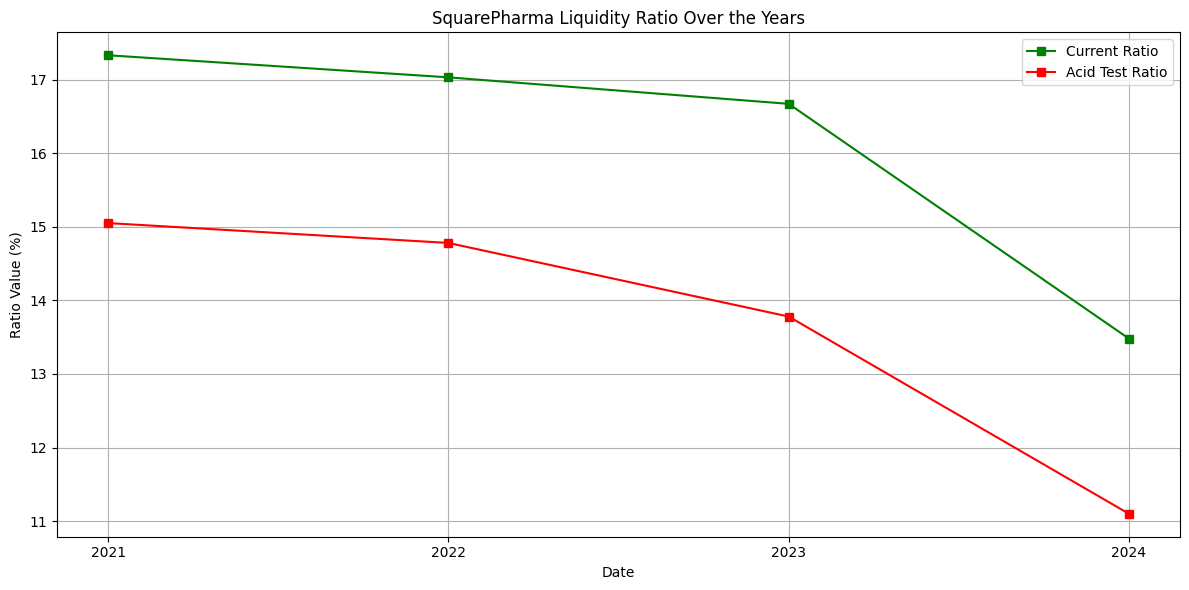

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ratio_squarepharma.index, ratio_squarepharma['Current ratio'],marker ='s', label='Current Ratio', color='green')
plt.plot(ratio_squarepharma.index, ratio_squarepharma['Acid Test Ratio'],marker ='s', label='Acid Test Ratio', color='red')
plt.title('SquarePharma Liquidity Ratio Over the Years')
plt.xlabel('Date')
plt.ylabel('Ratio Value (%)')
plt.xticks([2021,2022,2023,2024])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

-----

# **<u>Recommendation**

Yes, Square Pharmaceuticals Ltd. is strongly recommended for investment. The company’s stock are not volatile and instead steadily increasing, low long-term debt. Making good option for conservative and growth-seeking investors

---